# **Alucar: Analisando as vendas**

In [1]:
import pandas as pd

In [2]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar = pd.read_csv('alucar.csv')

In [4]:
print(f'Quantidade de linhas e colunas: {alucar.shape}')

Quantidade de linhas e colunas: (24, 2)


In [5]:
print(f'Quantidade de dados nulos: {alucar.isna().sum().sum()}')

Quantidade de dados nulos: 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [9]:
print(sns.__version__)

0.11.2


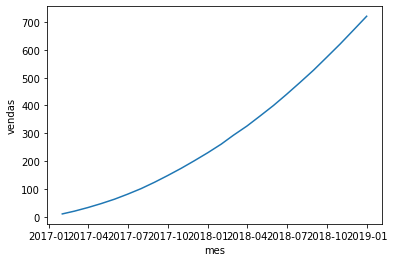

In [10]:
sns.lineplot(x='mes', y='vendas', data=alucar)

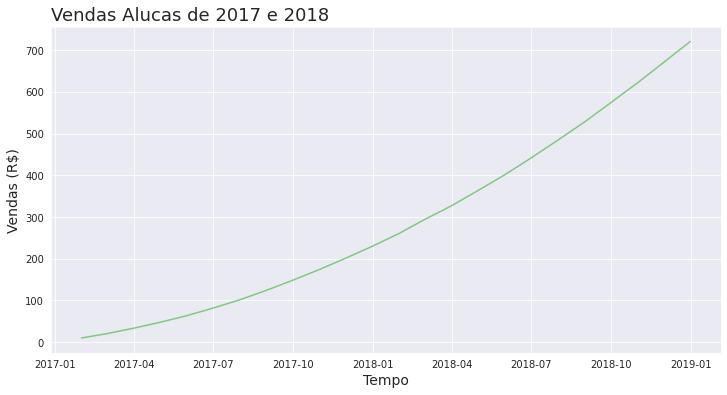

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucas de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [12]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [13]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


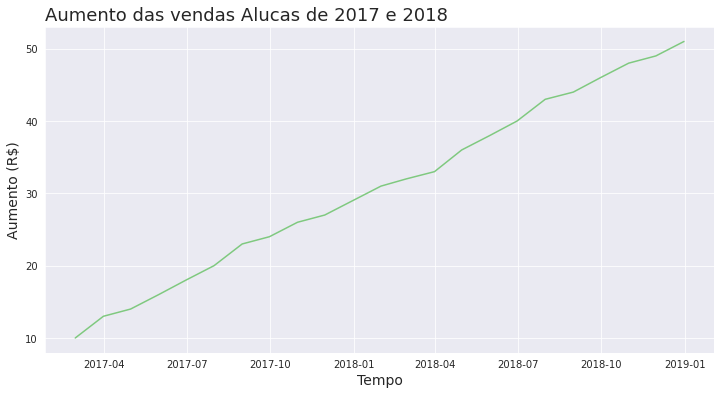

In [14]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas Alucas de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento (R$)', fontsize=14)
ax = ax

In [15]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

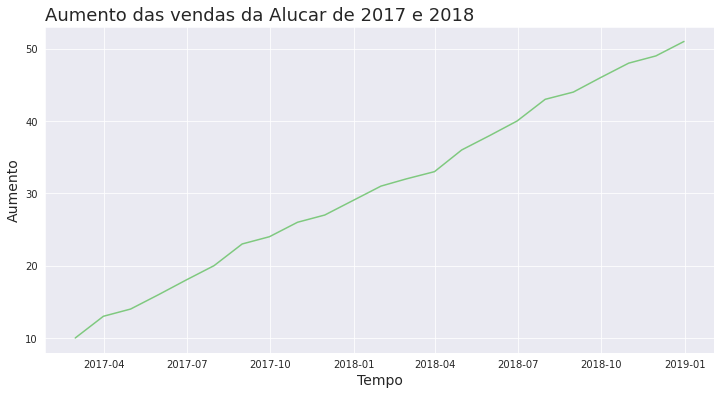

In [16]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento',
       'mes', 'aumento', alucar)

In [17]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


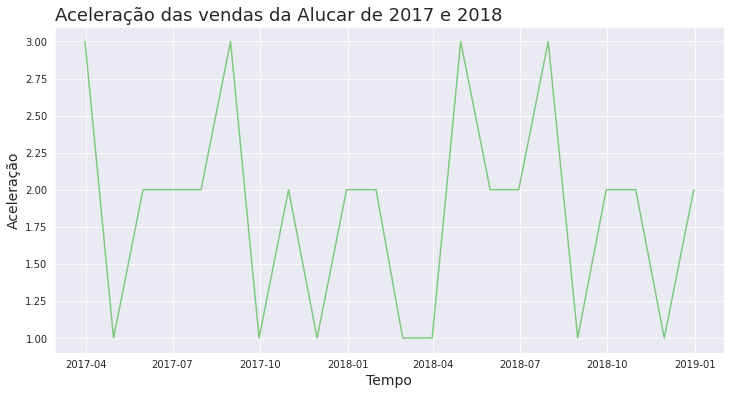

In [18]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração',
       'mes', 'aceleracao', alucar)

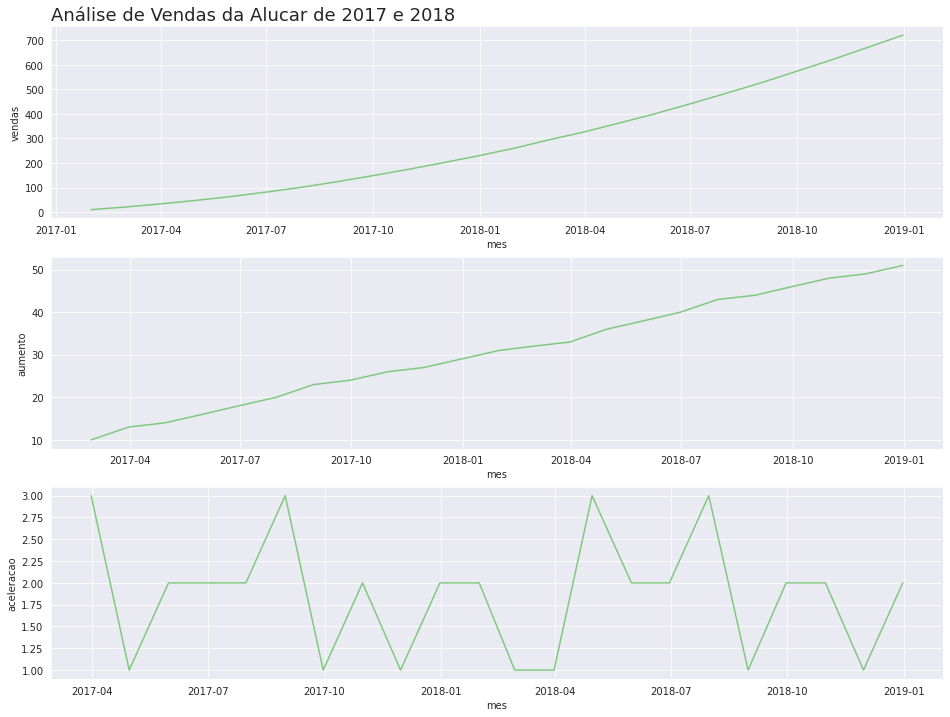

In [19]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1 ,1)
ax.set_title("Análise de Vendas da Alucar de 2017 e 2018", fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [20]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3, 1 ,1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

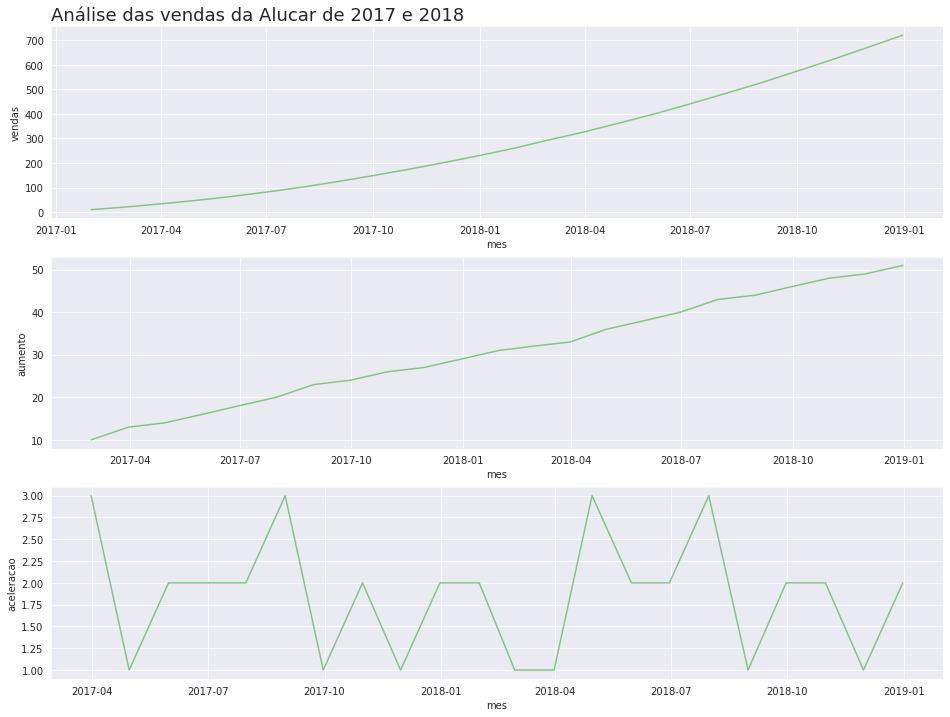

In [21]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                alucar, 'Análise das vendas da Alucar de 2017 e 2018')

## **Autocorrelação**

In [22]:
from pandas.plotting import autocorrelation_plot

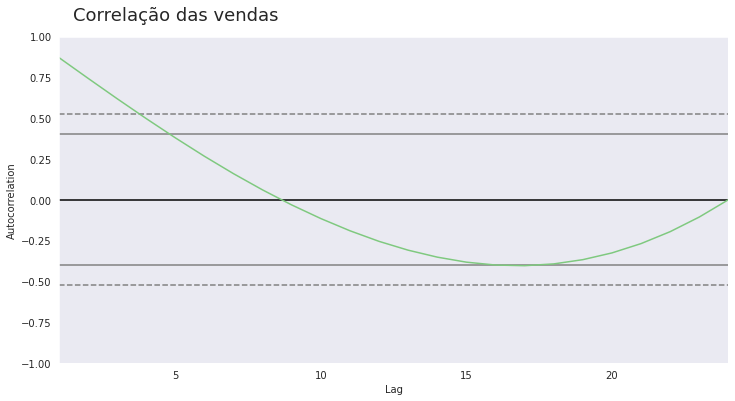

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

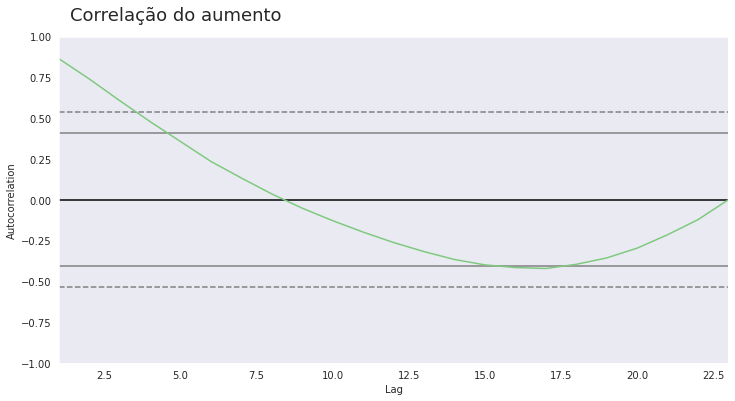

In [24]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

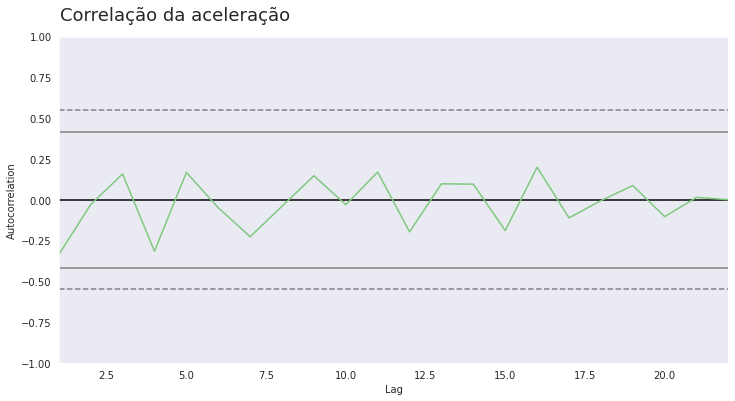

In [25]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# **Alucar - Analisando assinantes da newsletter**

In [26]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [27]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [28]:
print(f'Quantidade de linhas e colunas {assinantes.shape}')
print(f'Quantidade de dados nulos: {assinantes.isna().sum().sum()}')

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos: 0


In [29]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [30]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [31]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


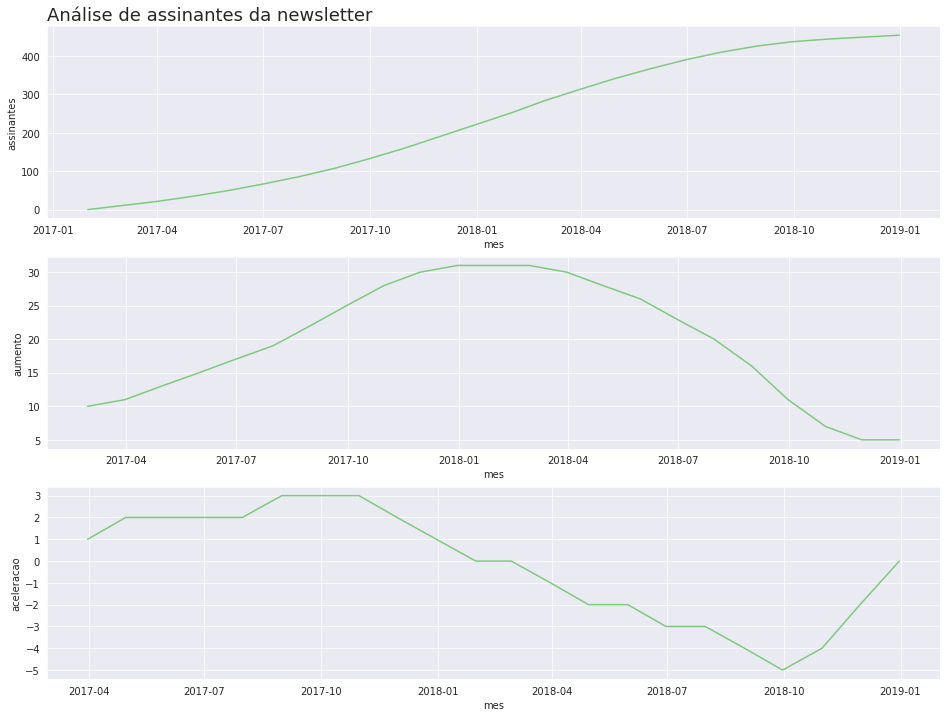

In [32]:
plot_comparacao(x='mes', y1='assinantes', y2='aumento', y3='aceleracao', dataset=assinantes, titulo = 'Análise de assinantes da newsletter')

# **Chocolura - Analisando as vendas**

In [33]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [34]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [35]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [36]:
print(f'Quantidade de linhas e colunas {chocolura.shape}')
print(f'Quantidade de resgistros nulos {chocolura.isna().sum().sum()}')

Quantidade de linhas e colunas (24, 2)
Quantidade de resgistros nulos 0


In [37]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


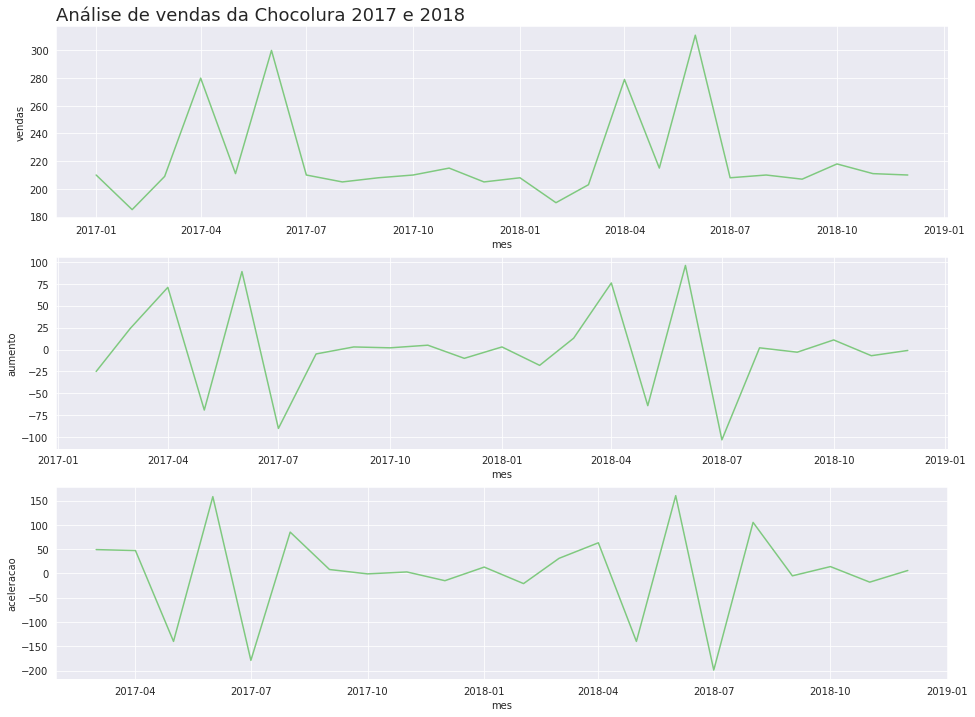

In [38]:
plot_comparacao(x='mes', y1='vendas', y2='aumento', y3='aceleracao',
                dataset=chocolura, titulo='Análise de vendas da Chocolura 2017 e 2018')

## **Chocolura - Vendas Diárias (Outubro e Novembro)**

In [39]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [40]:
print(f'Quantidade de linhas e colunas: {vendas_por_dia.shape}')
print(f'Quantidade de registros nulos: {vendas_por_dia.isna().sum().sum()}')

Quantidade de linhas e colunas: (61, 2)
Quantidade de registros nulos: 0


In [41]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [42]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [43]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


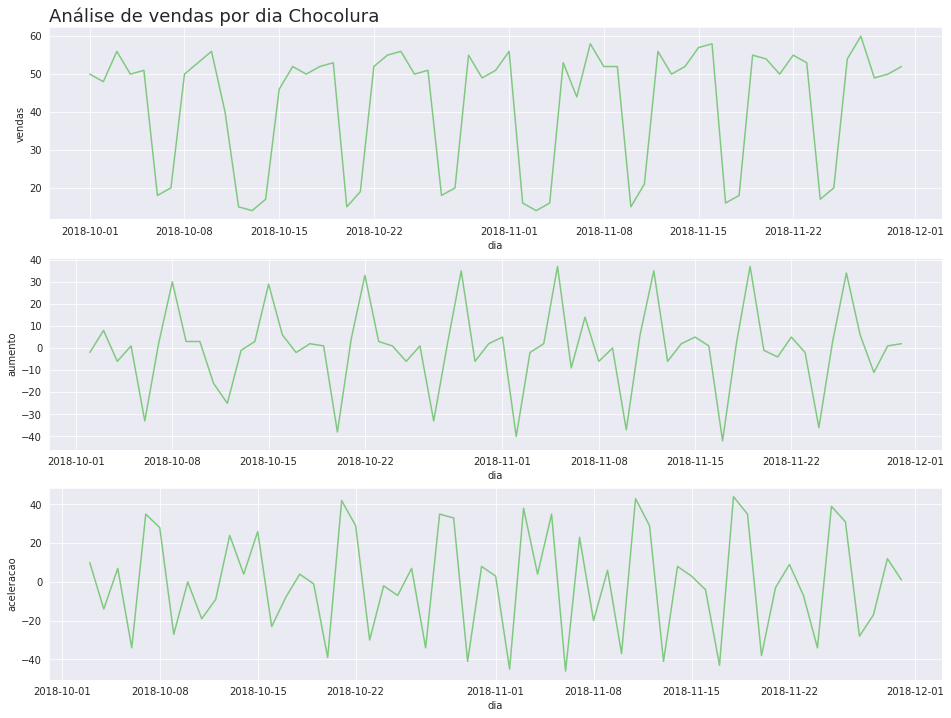

In [44]:
plot_comparacao(x='dia', y1='vendas', y2='aumento', y3='aceleracao',
                dataset=vendas_por_dia, titulo='Análise de vendas por dia Chocolura')

**Analisando a sazonalidade**

In [45]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [46]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [47]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [48]:
dias_traduzidos = {'Monday': 'Segunda',
                   'Tuesday': 'Terca',
                   'Wednesday': 'Quarta',
                   'Thursday': 'Quinta',
                   'Friday': 'Sexta',
                   'Saturday': 'Sabado',
                   'Sunday': 'Domingo'}

In [49]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [50]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [51]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


## **Agrupando os dias**

In [52]:
vendas_agrupadas = vendas_por_dia.groupby(['dia_da_semana']).mean().round(2)

In [53]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,18.88,3.00,30.75
Quarta,53.11,1.44,2.11
Quinta,51.33,-1.78,-3.22
Sabado,15.88,-27.75,-19.88
Segunda,52.33,33.75,30.75
Sexta,44.56,-6.78,-5.00
Terca,51.67,-0.67,-34.25


In [54]:
# selecao = (vendas_por_dia['dia_da_semana'] == 'Segunda') | (vendas_por_dia['dia_da_semana'] == 'Terca)' | (vendas_por_dia['dia_da_semana'] == 'Quarta') | (vendas_por_dia['dia_da_semana'] == 'Quinta') | (vendas_por_dia['dia_da_semana'] ==  'Sexta')
# vendas_por_dia[selecao]

In [55]:
vendas_por_dia['dia_da_semana'].unique()

array(['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado',
       'Domingo'], dtype=object)

In [56]:
selecao = (vendas_por_dia['dia_da_semana'] == 'Segunda') | (vendas_por_dia['dia_da_semana'] == 'Terca') | (vendas_por_dia['dia_da_semana'] == 'Quarta') | (vendas_por_dia['dia_da_semana'] == 'Quinta') | (vendas_por_dia['dia_da_semana'] == 'Sexta') 
media_dias_semana = pd.DataFrame(vendas_por_dia[selecao].mean()).T
media_dias_semana.index = ['Média dos dias da semana']
media_dias_semana

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


,vendas,aumento,aceleracao
Média dos dias da semana,50.6,4.545455,-1.930233


In [57]:
media_finais_de_semana = pd.DataFrame(vendas_por_dia[~selecao].mean()).T
media_finais_de_semana.index = ['Média dos finais de semana']
media_finais_de_semana

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


,vendas,aumento,aceleracao
Média dos finais de semana,17.375,-12.375,5.4375


In [58]:
medias = pd.concat([media_dias_semana, media_finais_de_semana])

In [59]:
medias

,vendas,aumento,aceleracao
Média dos dias da semana,50.600,4.545455,-1.930233
Média dos finais de semana,17.375,-12.375000,5.437500


**Correlação das vendas diárias**

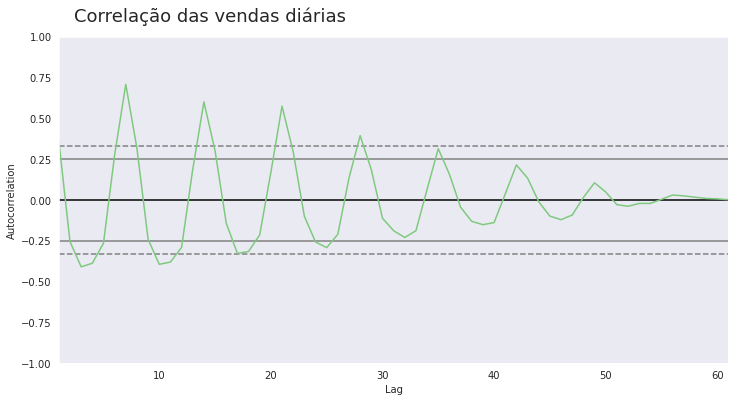

In [60]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

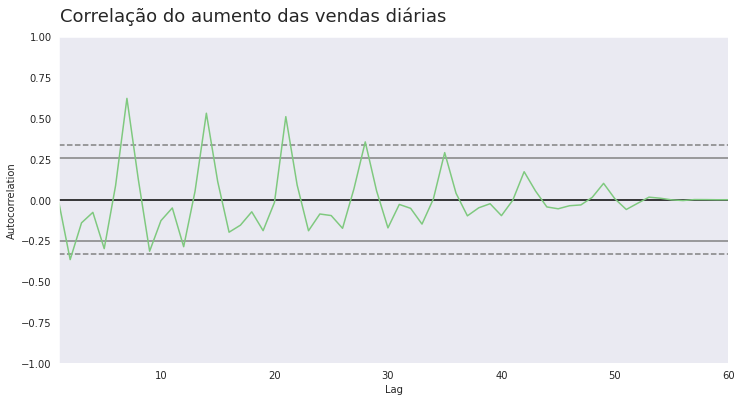

In [61]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

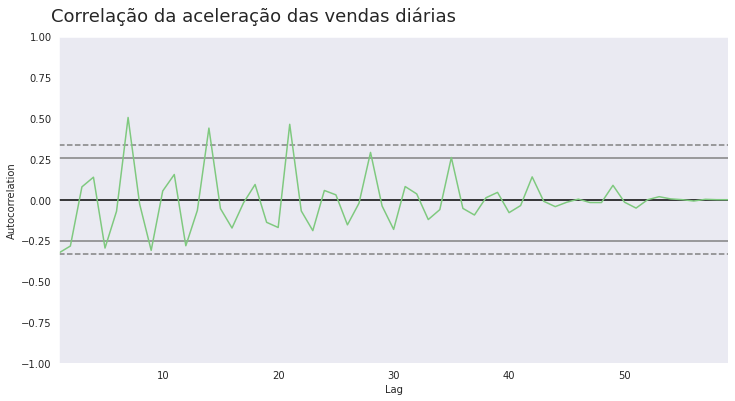

In [62]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

## **Cafelura: Análise de vendas**

In [63]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [64]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [65]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [66]:
print(f'Quantidade de linhas e colunas: {cafelura.shape}')
print(f'Quantidade de registros nulos: {cafelura.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de registros nulos: 0


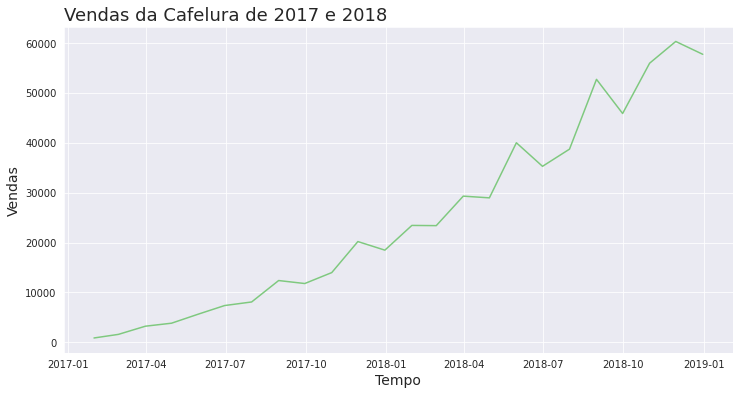

In [67]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas',
       'mes', 'vendas', cafelura)

In [68]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [69]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [70]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


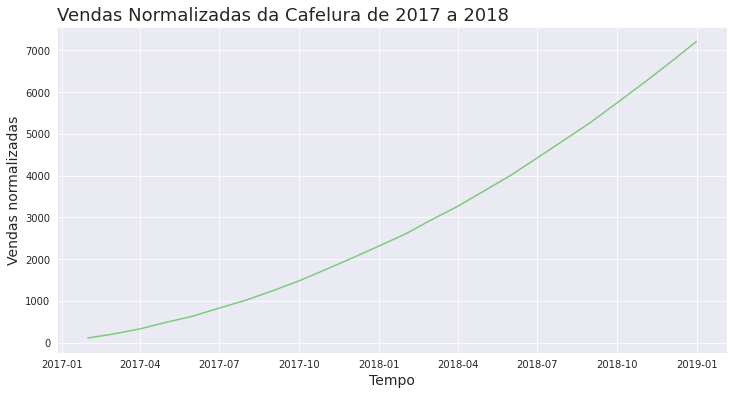

In [71]:
plotar('Vendas Normalizadas da Cafelura de 2017 a 2018', 
        'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas',
        cafelura)

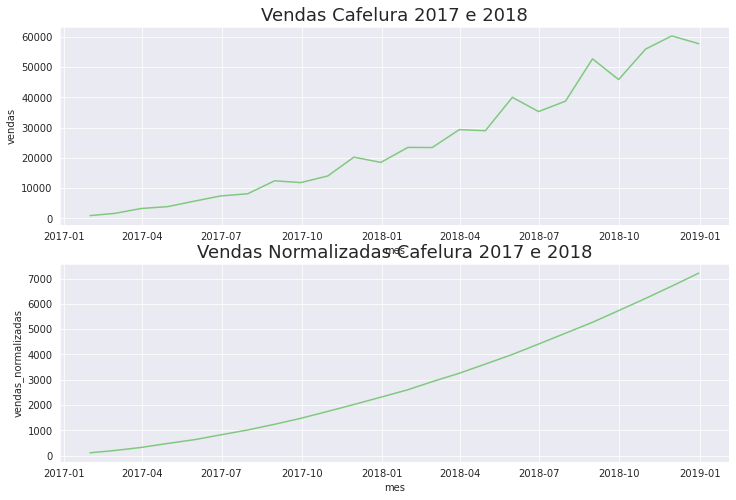

In [72]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)

## **Statsmodels**

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


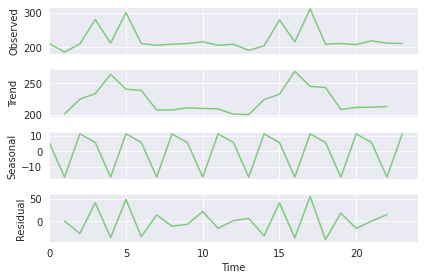

In [74]:
resultado = seasonal_decompose([chocolura['vendas']], freq=3)
ax = resultado.plot()

In [75]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [76]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


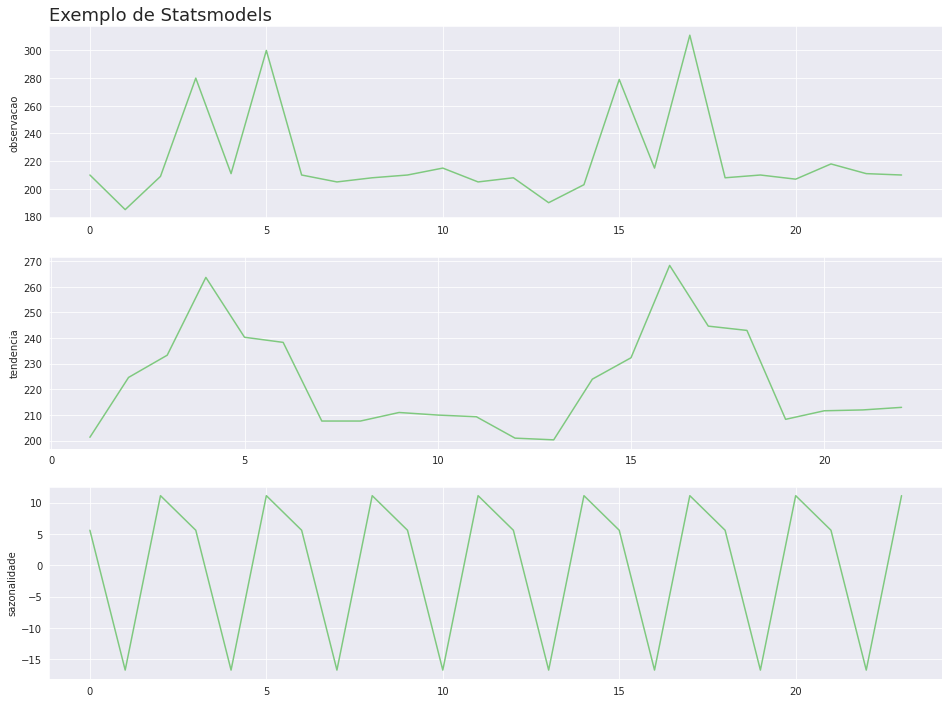

In [77]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade',
                resultado, 'Exemplo de Statsmodels')

## **Alucel - Análise de vendas**

In [78]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [79]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [80]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [81]:
print(f'Quantidade de linhas e colunas: {alucel.shape}')
print(f'Qauntidade de dados nulos: {alucel.isna().sum().sum()}')

Quantidade de linhas e colunas: (61, 2)
Qauntidade de dados nulos: 0


In [82]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


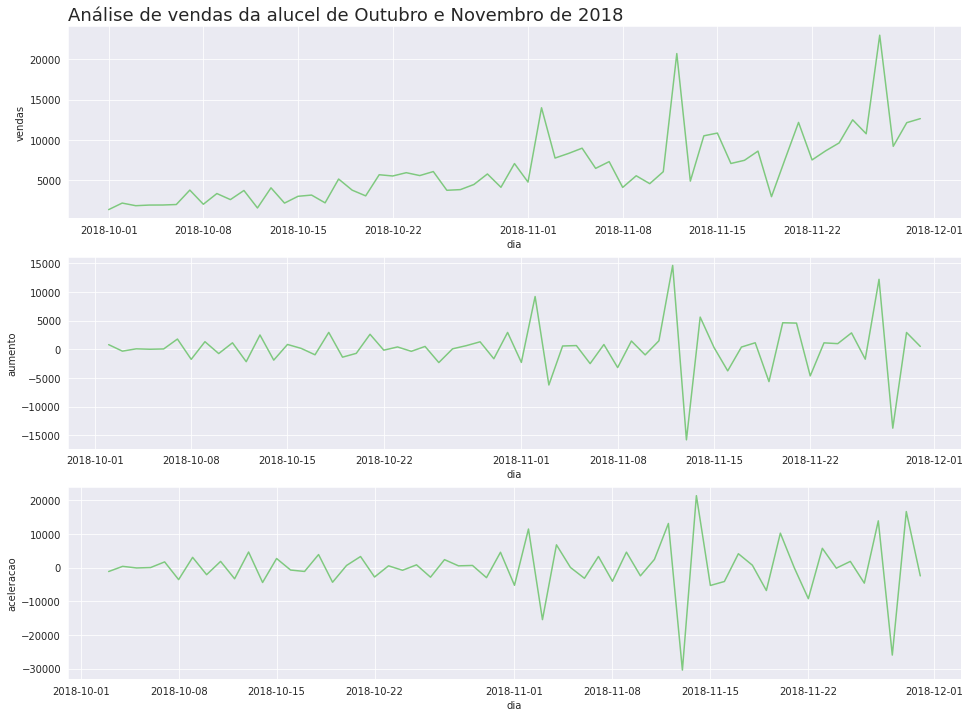

In [83]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
                alucel, 'Análise de vendas da alucel de Outubro e Novembro de 2018')

## **Média Móvel**

In [86]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [88]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


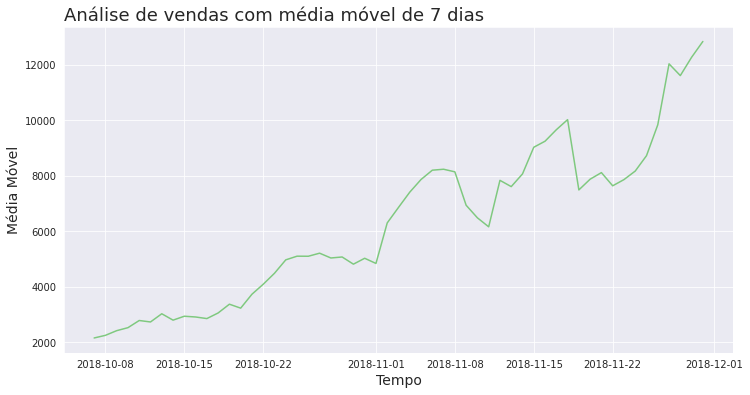

In [89]:
plotar('Análise de vendas com média móvel de 7 dias',
       'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [90]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

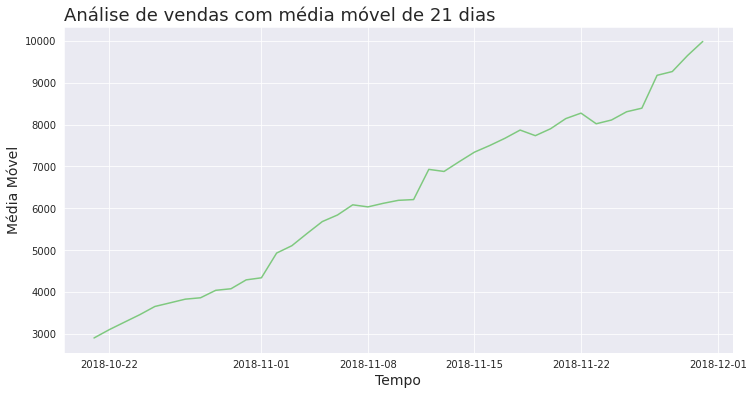

In [91]:
plotar('Análise de vendas com média móvel de 21 dias',
       'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

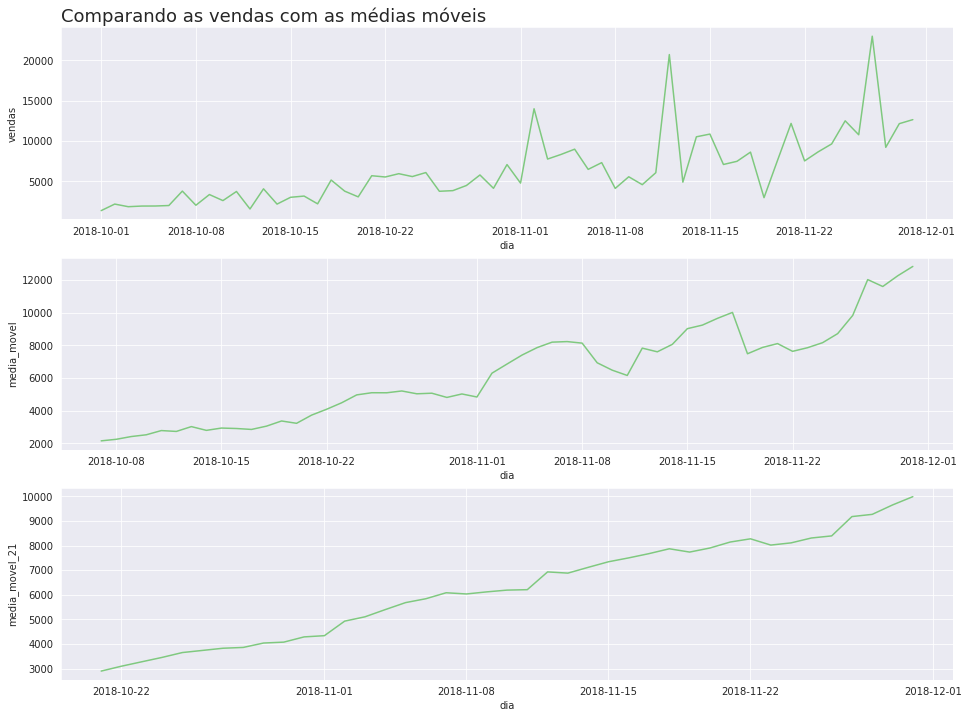

In [92]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21',
                alucel, 'Comparando as vendas com as médias móveis')